In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import kurtosis, skew, shapiro
data = pd.read_csv('./data/train.csv')

# Data Categories Explanation

- **FAVC**: Frequent consumption of high caloric food
- **FCVC**: Frequency of consumption of vegetables
- **NCP**: Number of main meals
- **CAEC**: Consumption of food between meals
- **CH2O**: Consumption of water daily
- **CALC**: Consumption of alcohol
- **SCC**: Calories consumption monitoring
- **FAF**: Physical activity frequency
- **TUE**: Time using technology devices
- **MTRANS**: Transportation used

Target Category: **NObeyesdad**


In [2]:
data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
# Get categorical and numerical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Print the results
print("Categorical columns:")
print(categorical_columns)
print("\nNumerical columns:")
print(numerical_columns)

# Display basic statistics for numerical columns
print("\nNumerical data statistics:")
print(data[numerical_columns].describe())

# Display value counts for categorical columns (first few to avoid cluttering output)
print("\nCategorical data value counts (first 3 columns):")
for col in categorical_columns[:3]:
    print(f"\n{col}:")
    print(data[col].value_counts())

Categorical columns:
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

Numerical columns:
['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

Numerical data statistics:
                id           Age        Height        Weight          FCVC  \
count  20758.00000  20758.000000  20758.000000  20758.000000  20758.000000   
mean   10378.50000     23.841804      1.700245     87.887768      2.445908   
std     5992.46278      5.688072      0.087312     26.379443      0.533218   
min        0.00000     14.000000      1.450000     39.000000      1.000000   
25%     5189.25000     20.000000      1.631856     66.000000      2.000000   
50%    10378.50000     22.815416      1.700000     84.064875      2.393837   
75%    15567.75000     26.000000      1.762887    111.600553      3.000000   
max    20757.00000     61.000000      1.975663    165.057269      3.000000   

                NCP          CH2O           FAF 

/tmp/ipykernel_5998/615492976.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad', y='BMI', data=data, palette='viridis')


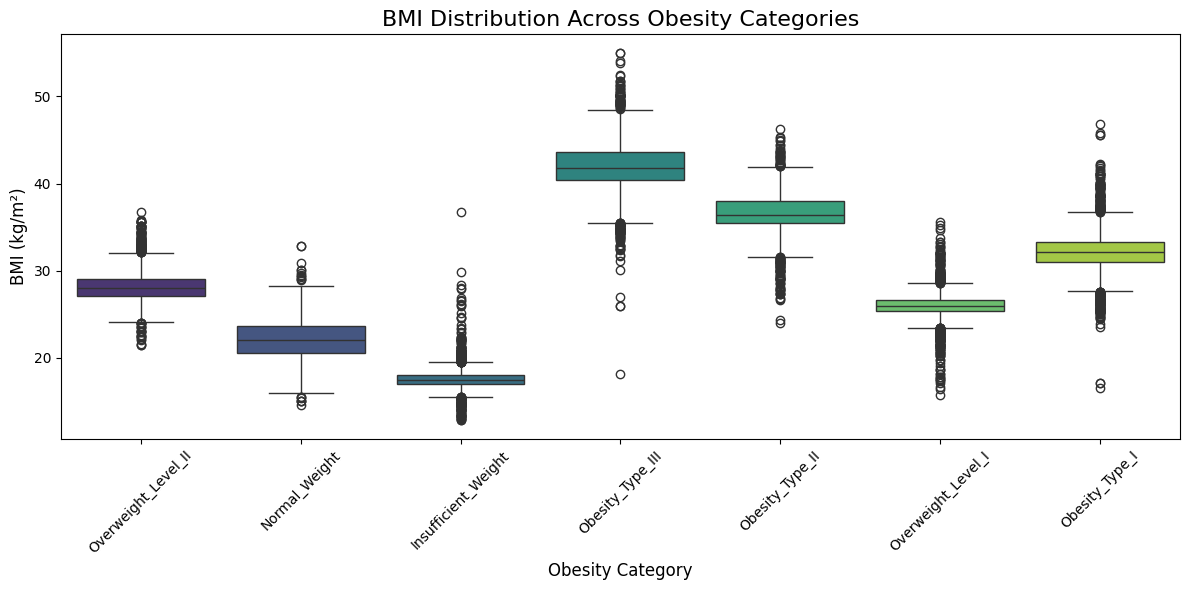

In [4]:
# Calculate BMI
data['BMI'] = data['Weight'] / (data['Height'] ** 2)

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='NObeyesdad', y='BMI', data=data, palette='viridis')

# Add labels and title
plt.title('BMI Distribution Across Obesity Categories', fontsize=16)
plt.xlabel('Obesity Category', fontsize=12)
plt.ylabel('BMI (kg/m²)', fontsize=12)
plt.xticks(rotation=45)

# Improve layout
plt.tight_layout()
plt.show()

/tmp/ipykernel_5998/2669734629.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=class_counts.values, y=class_counts.index, palette='viridis')


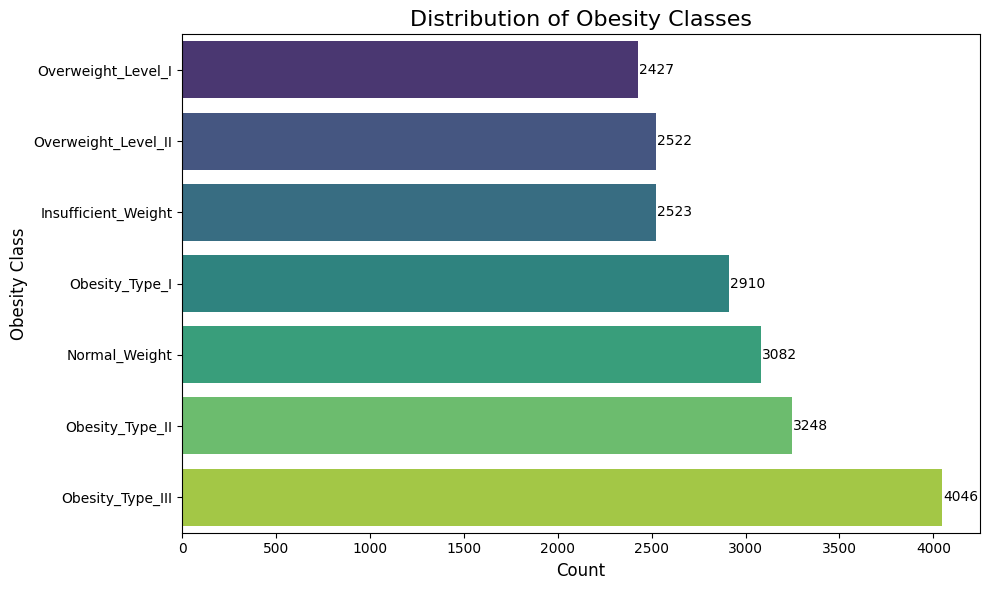

In [5]:
# Create a horizontal bar plot for the distribution of obesity classes
plt.figure(figsize=(10, 6))
class_counts = data['NObeyesdad'].value_counts().sort_values(ascending=True)
ax = sns.barplot(x=class_counts.values, y=class_counts.index, palette='viridis')

# Add labels and title
plt.title('Distribution of Obesity Classes', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Obesity Class', fontsize=12)

# Add count values on bars
for i, v in enumerate(class_counts.values):
    ax.text(v + 5, i, str(v), va='center')
 
# Improve layout
plt.tight_layout()
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [7]:
# Prepare the data for modeling
# Separate features and target
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

# First, split the data to ensure no data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode categorical variables using one-hot encoding
# First identify all categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns

In [8]:
# Create a one-hot encoder and fit it only on the training data
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoder.fit(X_train[categorical_cols])
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

In [9]:
# Transform training data
encoded_cats_train = pd.DataFrame(
    encoder.transform(X_train[categorical_cols]), 
    columns=encoded_feature_names, 
    index=X_train.index
)
X_train_encoded = pd.concat([X_train[numeric_cols], encoded_cats_train], axis=1)

# Transform test data using the same encoder
encoded_cats_test = pd.DataFrame(
    encoder.transform(X_test[categorical_cols]), 
    columns=encoded_feature_names, 
    index=X_test.index
)
X_test_encoded = pd.concat([X_test[numeric_cols], encoded_cats_test], axis=1)

# Train the classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_encoded, y_train)

# Make predictions
y_pred = clf.predict(X_test_encoded)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.905587668593449

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.95      0.94      0.94       524
      Normal_Weight       0.88      0.90      0.89       626
     Obesity_Type_I       0.88      0.86      0.87       543
    Obesity_Type_II       0.97      0.97      0.97       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.79      0.79      0.79       484
Overweight_Level_II       0.81      0.80      0.81       514

           accuracy                           0.91      4152
          macro avg       0.90      0.89      0.90      4152
       weighted avg       0.91      0.91      0.91      4152



In [10]:
test_data = pd.read_csv('./data/test.csv')

In [11]:
def predict_obesity_categories(test_data):
    """
    Predict obesity categories for a test dataset using the trained Random Forest model
    
    Parameters:
    -----------
    test_data : pandas DataFrame
        The test data containing the same features as the training data, without the target
        
    Returns:
    --------
    pandas DataFrame
        A DataFrame with id and predicted obesity categories
    """
    # Make a copy to avoid modifying the original data
    test_data_copy = test_data.copy()
    
    # Calculate BMI for test data
    test_data_copy['BMI'] = test_data_copy['Weight'] / (test_data_copy['Height'] ** 2)
    
    # Identify categorical and numerical columns
    categorical_cols = test_data_copy.select_dtypes(include=['object']).columns
    
    # We need to use the same numeric columns as were used during training
    # Get numeric columns from X_train_encoded but exclude 'id' for predictions
    numeric_cols = [col for col in X_train_encoded.columns if col in test_data_copy.columns and col != 'id']
    
    # Handle unknown categories by mapping them to known categories
    # This fixes the 'Always' value in CAEC column not seen during training
    train_caec_values = X_train['CAEC'].unique()
    
    # Replace any values not in training data with the most common value
    for col in categorical_cols:
        if col in X_train.columns:
            valid_values = X_train[col].unique()
            test_data_copy[col] = test_data_copy[col].apply(
                lambda x: x if x in valid_values else X_train[col].mode()[0]
            )
    
    # Transform categorical features for test set using the trained encoder
    encoded_cats_test = pd.DataFrame(
        encoder.transform(test_data_copy[categorical_cols]), 
        columns=encoder.get_feature_names_out(categorical_cols), 
        index=test_data_copy.index
    )
    
    # Combine with numeric features
    test_encoded = pd.concat([test_data_copy[numeric_cols], encoded_cats_test], axis=1)
    
    # Ensure test_encoded has the same columns in the same order as X_train_encoded
    missing_cols = set(X_train_encoded.columns) - set(test_encoded.columns)
    for col in missing_cols:
        test_encoded[col] = 0  # Add missing columns with default value 0
    
    # Reorder columns to match training data
    test_encoded = test_encoded[X_train_encoded.columns]
    
    # Make predictions
    predictions = clf.predict(test_encoded)
    
    # Create submission DataFrame
    submission = pd.DataFrame({
        'id': test_data_copy['id'],
        'NObeyesdad': predictions
    })
    
    return submission

submission = predict_obesity_categories(test_data)
submission.to_csv('submission.csv', index=False)
